### Indicators of Heavy Traffic on Interstate 94:

##### **Goal:** Using the Interstate 94 dataset we will determine a few indicators of heavy traffic. These indicators can be weather type, time of the day, time of the week, etc. 

Note: The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of the analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalising results for the entire I-94 highway.

### The I-94 Traffic Dataset:
John Hogue made the dataset available that we'll be working with, and you can download it from the [UCI Machine Learning Repository.](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

In [129]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
# read in dataset
traffic = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'])
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [40]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [41]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


## Analysing Traffic Volume:
We begin our analysis by examing the distribution of the `traffic_volume` column.

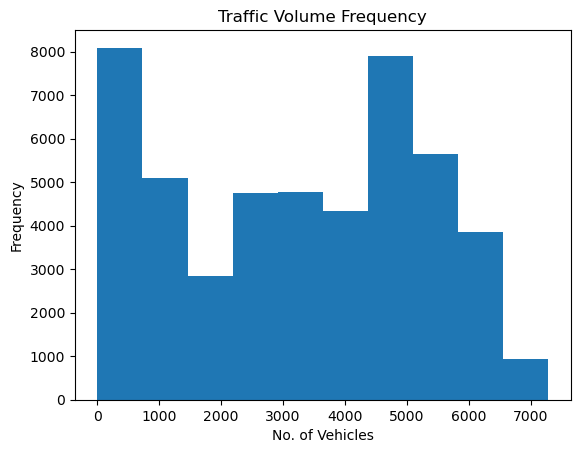

In [131]:
traffic['traffic_volume'].plot.hist(title='Traffic Volume Frequency', bins=10)
plt.xlabel('No. of Vehicles')
plt.show()

In [43]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the Traffic Volume histogram, we can observe a few key points:

 - The distribution is multi-modal, which means there are several peaks representing different common traffic volumes.
 - There is a significant frequency at the lower end of the traffic volume spectrum, suggesting there are many instances when the traffic volume is relatively low.
 - There are also peaks at the higher end, which could correspond to rush hours or other times when traffic is typically heavy.

Stats Summary
 - From 2nd October 2012 to 30th September 2018, hourly traffic volume varied significantly, ranging from 0 to 7,280 cars with an average volume of 3,259 cars.
 - Approximately 25% of the time (the first quartile), the traffic volume was 1,193 cars or fewer per hour. Conversely, the traffic volume in the third quartile was about four times higher, with around 4,933 cars.
 - The substantial difference between the 25th and 75th percentiles suggests significant variation in traffic volume, likely influenced by the time of day. The lower volume at the 25th percentile may reflect nighttime or non-peak hours, whereas the higher volume at the 75th percentile likely corresponds to daytime or peak traffic periods, such as rush hours.

## Traffic Volume: Day vs. Night:
We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.


In [44]:
day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


## Traffic Volume: Day vs. Night (II):

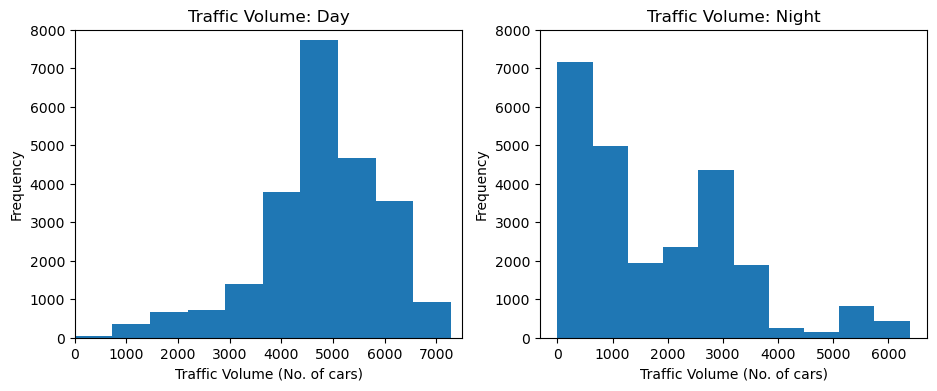

In [45]:
#create figure
plt.figure(figsize=(11,4))

#first plot
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume (No. of cars)')
plt.ylabel('Frequency')
plt.xlim(0,7500)
plt.ylim(0,8000)

#second plot 
plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume (No. of cars)')
plt.ylabel('Frequency')
plt.xlim()
plt.ylim(0,8000)

plt.show()


In [46]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [47]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This indicates that most of the traffic volume values are high. There are 4,252 or more cars passing the station every hour 75% of the time. 

The histogram that shows the distribution of traffic volume during the night is right skewed. This indicates that most of the traffic volume is low. 75% of the time, the number of cars that were recorded each hour was less than 2,819 cars. 

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

## Traffic Indicators:

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

Let's look at some line plots showing how the traffic volume changes according to the following:

 - Month
 - Day of the week
 - Time of day


In [61]:
# create new 'month' column
day['month'] = day['date_time'].dt.month

# group by 'month' and calculate the average across numeric columns
# explicitly setting numeric_only=True to avoid FutureWarning
by_month = day.groupby('month').mean(numeric_only=True)

# isolate and view the average of the 'traffic_volume' column by month
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

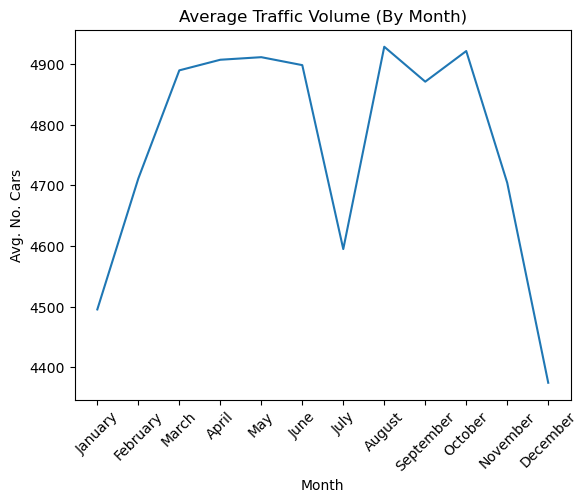

In [78]:
by_month['traffic_volume'].plot()
plt.title('Average Traffic Volume (By Month)')
plt.xlabel('Month')
plt.ylabel('Avg. No. Cars')
# Set the x-axis labels to days of the week
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.show()

The line plot indicates less traffic between Nov - Feb (colder months) and higher traffic volumes between March - October (warmer months)

July seems to be an exception. Let's explore this further...

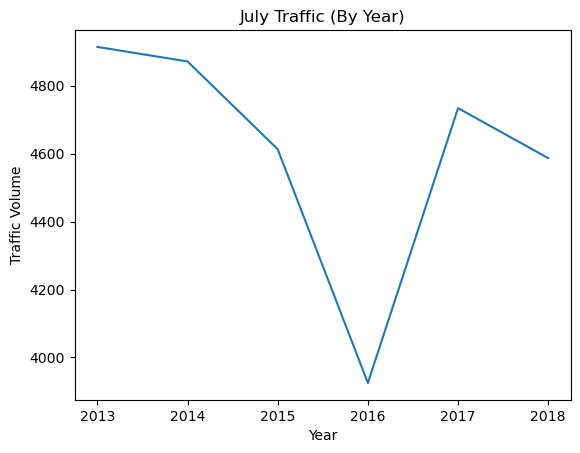

In [133]:
# Exploring July for each year of data

day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean(numeric_only=True)['traffic_volume'].plot.line()
plt.title('July Traffic (By Year)')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.show()

It seems that the July decrease in traffic volume is unique to 2016. Possibly indicating road works or a similiar one off event. 

As a tentative conclusion here, we can say that warm months (March - October) generally show heavier traffic compared to colder  months (November - February). In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Time Indicators (II):

Let's now explore a more granular indicator: day of the week 

In [64]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby(day['dayofweek']).mean(numeric_only=True)
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday 

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

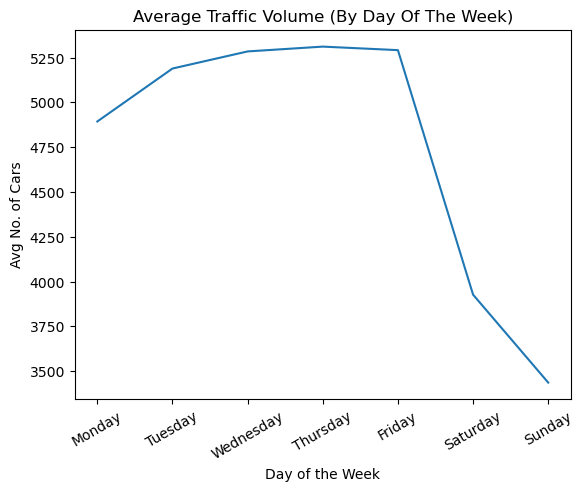

In [75]:
by_dayofweek['traffic_volume'].plot.line()
plt.title('Average Traffic Volume (By Day Of The Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Avg No. of Cars')

# Set the x-axis labels to days of the week
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=30)
plt.show()



From our line graph it's clear that traffic is higher on weekdays (Mon-Fri) and lower of weekends(Sat-Sun)

## Time Indicators (III):

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [88]:
day['hour'] = day['date_time'].dt.hour

business_days = day.copy()[(day['dayofweek'] <= 4)] # 0 - 4 == Monday to Friday 
weekend = day.copy()[day['dayofweek'] >= 5] # 5-6 == Saturday to Sunday 

by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)

print(f"Average traffic volume by hour on business days: ", by_hour_business['traffic_volume'])
print("\n")
print(f"Average traffic volume by hour on weekends: ", by_hour_weekend['traffic_volume'])

Average traffic volume by hour on business days:  hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


Average traffic volume by hour on weekends:  hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


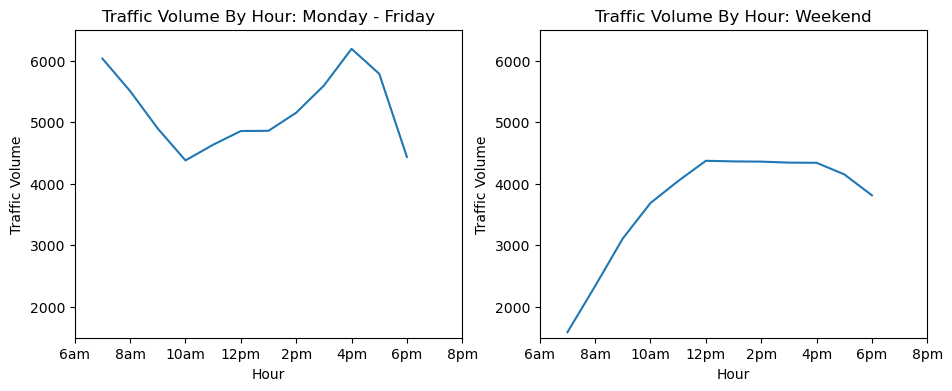

In [144]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume By Hour: Monday - Friday')
plt.xlim(6,20)
plt.ylim(1500, 6500)
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=[6,8,10,12,14,16,18,20], labels=['6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm'])

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume By Hour: Weekend')
plt.xlim(6,20)
plt.ylim(1500, 6500)
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=[6,8,10,12,14,16,18,20], labels=['6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm'])

plt.show()

Business Days - Clear indicators that peak hours (7am-8.30am) and (2pm-5.30pm) have the highest traffic volume. Mostly being above 5000 cars. This is likely due to work commutes and potentially school pickups. 

Weekends - Generally lower volume across all hours of the day compared to business days. 

To summarise, we found a few time-related indicators of heavy traffic:

 - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
 - The traffic is usually heavier on business days compared to weekends.
 - On business days, the rush hours are around 7am and 4pm, peaking at approx 6000 cars. 


## Weather Indicators:

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [107]:
day.corr()['traffic_volume']

/var/folders/px/x65fp4pn31s5cv4gsbh_3cl80000gn/T/ipykernel_87665/3421110943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
year             -0.003557
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with `traffic_volume`.

Let's generate a scatter plot to visualise the correlation between `temp` and `traffic_volume`


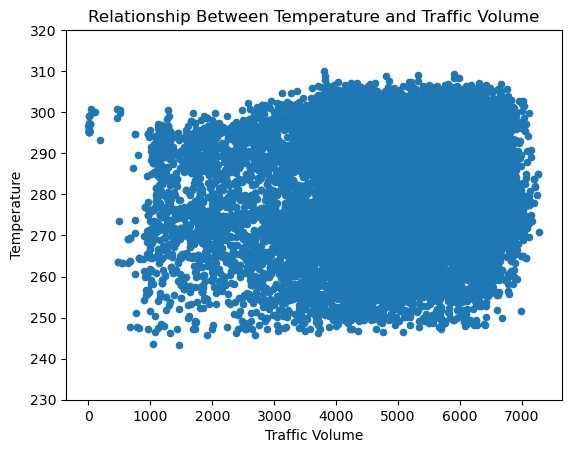

In [137]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong temperatures mess up the y-axis
plt.title('Relationship Between Temperature and Traffic Volume')
plt.ylabel('Temperature')
plt.xlabel('Traffic Volume')
plt.show()

The scatter plot above indicates that `temp` does not seem to be a strong indicator of heavy traffic. 

Let's now look at the other weather-related columns: `weather_main` and `weather_description`.

In [116]:
by_weather_main = day.groupby('weather_main').mean(numeric_only=True)
by_weather_description = day.groupby('weather_description').mean(numeric_only=True)

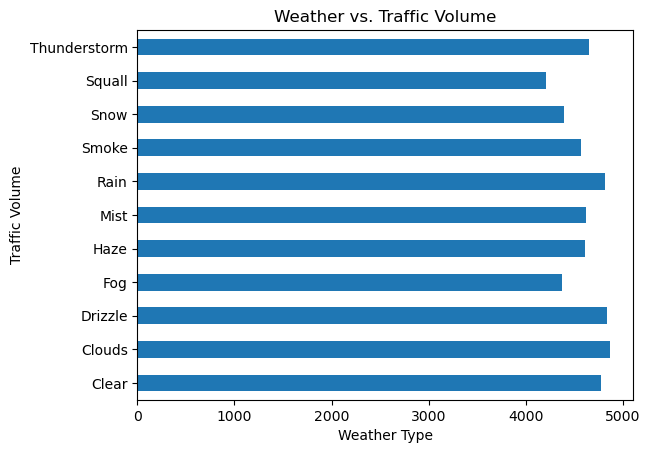

In [139]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Weather vs. Traffic Volume')
plt.xlabel('Weather Type')
plt.ylabel('Traffic Volume')
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

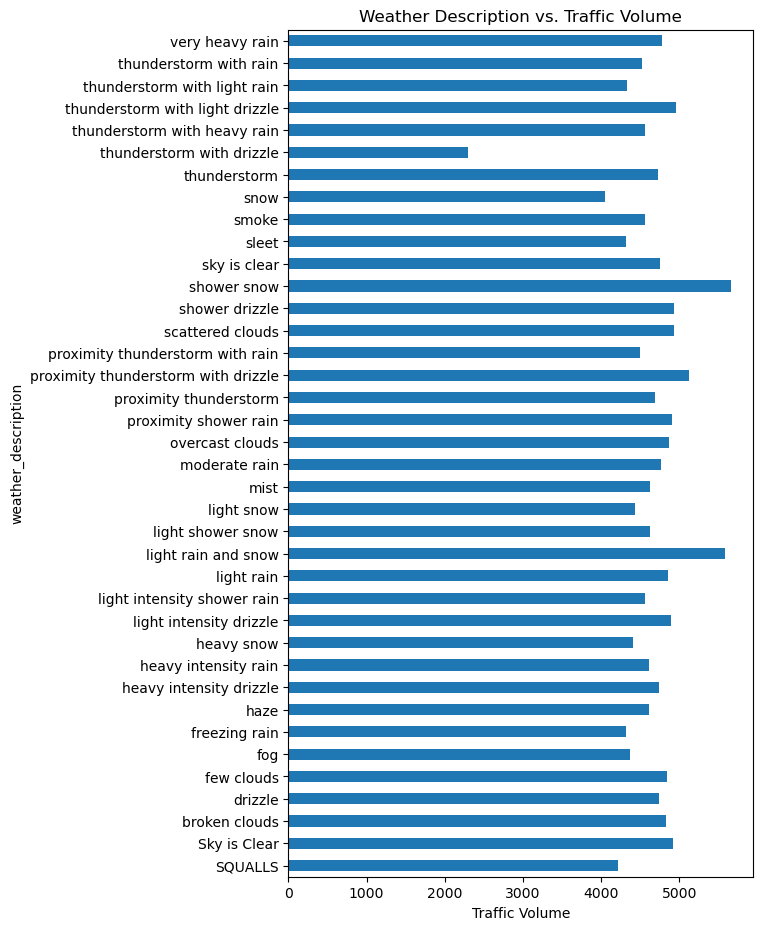

In [141]:
by_weather_description['traffic_volume'].plot.barh(figsize=(6,11))
plt.title('Weather Description vs. Traffic Volume')  
plt.xlabel('Traffic Volume')                                             
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000 cars:

- Shower snow  
- Light rain and snow  
- Proximity thunderstorm with drizzle  

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars when the weather falls into the above categories instead of using public transport, riding a bike or walking.

## Conclusion:

After exploring the I-94 dataset, we were able to find two key indicators of heavy traffic (specifically exploring daytime hours):

 - **Time Indicators:**
     - Warmer months (March - October) resulted in heavier traffic compared to colder months (November - February)
     - Heavier traffic is expected during weekdays compared to weekends. 
     - On weekdays, peak hours look to be 7am and 4pm.

 - **Weather Indicators:**
    - Heavier traffic is expected during these weather conditions: 
    
        - Shower snow
        - Light rain and snow
        - Proximity thunderstorm with drizzle